In [2]:
#Solving A --> B--> C in batch reactor
from scipy.integrate import solve_ivp
import numpy as np


dcdt = ['dy[0]/dt = -k1 * Ca', 'dy[1]/dt = k1 * Ca - k2 * Cb', 'dy[2]/dt = k2 * Cb']
dydt = np.zeros(3)
print(dcdt[1].split('=')[1])

 k1 * Ca - k2 * Cb


[-1.  1.  0.]


Text(0, 0.5, 'C')

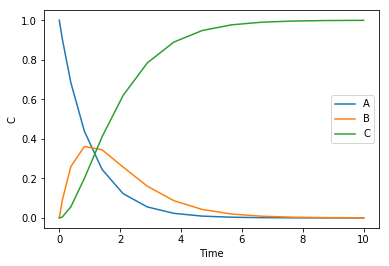

In [3]:
 

C0 = [1.0, 0.0, 0.0]
k1 = 1
k2 = 1
def ode(t, C):
    Ca, Cb, Cc = C
    for i in range (len(dcdt)):
        dydt[i] = eval(dcdt[i].split('=')[1])
    return dydt

print(ode((0,10), C0))
sol = solve_ivp(ode,(0, 10), C0)
#print(sol.y.T)

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(sol.t, sol.y.T)
plt.legend(['A', 'B', 'C'])
plt.xlabel('Time')
plt.ylabel('C')
#sol

[-0.89021855  0.7653304   0.7653304   0.3826652   0.          0.12488815]
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.2 µs


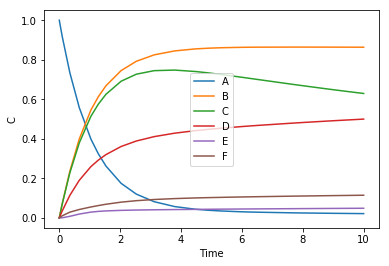

In [4]:
import numpy as np
#not included reverse reactions
from scipy.integrate import solve_ivp

dcdt = ['dy[0]/dt = - kf[0] * y[0] +  kr[0]* y[1] * y[2] ** 2.0 - kf[1] * y[0] +  kr[1]* y[1] * y[3] - kf[2] * y[0] +  kr[2]* y[5] ', 'dy[1]/dt = + kf[0] * y[0] - kr[0]* y[1] * y[2] ** 2.0 + kf[1] * y[0] - kr[1]* y[1] * y[3] + kf[3] * y[5] - kr[3]* y[1] * y[4] ', 'dy[2]/dt = + 2.00 * kf[0] * y[0] - 2.00 *  kr[0]* y[1] * y[2] ** 2.0 ', 'dy[3]/dt = + kf[1] * y[0] - kr[1]* y[1] * y[3] ', 'dy[4]/dt = + kf[3] * y[5] - kr[3]* y[1] * y[4] ', 'dy[5]/dt = + kf[2] * y[0] - kr[2]* y[5] - kf[3] * y[5] +  kr[3]* y[1] * y[4] ']
C0 = [1, 0.0, 0.0, 0.0, 0.0, 0.0]
kf = [0.38266520209580795,
 0.38266520209580795,
 0.12488815036321174,
 1.5429972059873165]
#kf = [1.0, 1.0, 1.0, 1.0]

kr = [0.05154530244729928, 0.0007450410862074591, 0.0003377084903080553, 4.174337399515723]

dydt = np.zeros(6)

def ode(t, C):
    y = C
    for i in range (len(dcdt)):
        dydt[i] = eval(dcdt[i].split('=')[1])
    return dydt

print(ode((0,10), C0))
sol = solve_ivp(ode,(0, 10), C0)
#print(sol.y.T)

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(sol.t, sol.y.T)
plt.legend(['A', 'B', 'C', 'D', 'E', 'F'])
plt.xlabel('Time')
plt.ylabel('C')
#sol
%time

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.77 µs


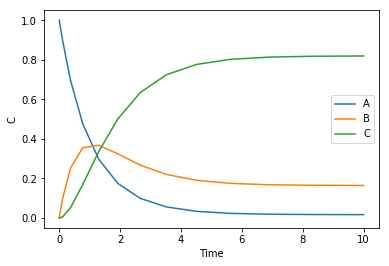

In [5]:

def ode(t, C):
    Ca, Cb, Cc = C
    dCadt = -k1 * Ca + k_1 *Cb
    dCbdt = k1 * Ca - k2 * Cb - k_1 * Cb + k_2 * Cc
    dCcdt = k2 * Cb - k_2 * Cc
    return [dCadt, dCbdt, dCcdt]

C0 = [1.0, 0.0, 0.0]
k1 = 1
k2 = 1
k_1 = 0.1
k_2 = 0.2

sol = solve_ivp(ode, (0, 10), C0)
#print(sol.y.T)

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(sol.t, sol.y.T)
plt.legend(['A', 'B', 'C'])
plt.xlabel('Time')
plt.ylabel('C')
#sol
%time

Text(0, 0.5, 'C')

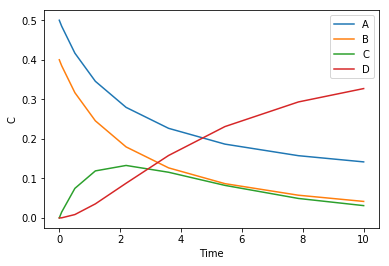

In [6]:
#Solving A + B --> C --> D in batch reactor
#not included reverse reactions
from scipy.integrate import solve_ivp


def ode(t, C):
    Ca, Cb, Cc, Cd = C
    dCadt = -k1 * Ca * Cb 
    dCbdt = -k1 * Ca * Cb   
    dCcdt = k1 * Ca * Cb - k2 * Cc 
    dCddt = k2 * Cc
    
    return [dCadt, dCbdt, dCcdt, dCddt]

C0 = [0.5, 0.4, 0.0, 0.0]
k1 = 1
k2 = 0.4



sol = solve_ivp(ode, (0, 10), C0)
#print(sol.y.T)

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(sol.t, sol.y.T)
plt.legend(['A', 'B', 'C', 'D'])
plt.xlabel('Time')
plt.ylabel('C')
#sol

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.2 µs


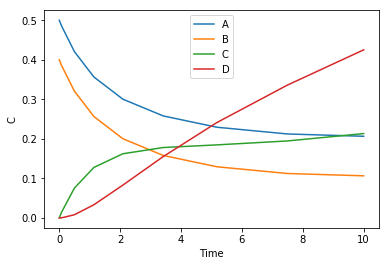

In [7]:
#Solving A + B --> C --> D in batch reactor
# included reverse reactions
from scipy.integrate import solve_ivp


def ode(t, C):
    Ca, Cb, Cc, Cd = C
    dCadt = -k1 * Ca * Cb + k_1 * Cc
    dCbdt = -k1 * Ca * Cb + k_1 * Cc 
    dCcdt = k1 * Ca * Cb - k2 * Cc + k_1 * Cc + k_2 * Cd
    dCddt = k2 * Cc - k_2 * Cd
    
    return [dCadt, dCbdt, dCcdt, dCddt]

C0 = [0.5, 0.4, 0.0, 0.0]
k1 = 1
k2 = 0.4
k_1 = 0.1
k_2 = 0.12



sol = solve_ivp(ode, (0, 10), C0)
#print(sol.y.T)

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(sol.t, sol.y.T)
plt.legend(['A', 'B', 'C', 'D'])
plt.xlabel('Time')
plt.ylabel('C')
#sol
%time

Text(0, 0.5, 'C')

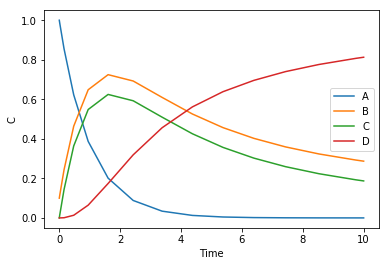

In [8]:
# Solving A --> B + C --> D in batch reactor
#not included reverse reactions
from scipy.integrate import solve_ivp


def ode(t, C):
    Ca, Cb, Cc, Cd = C
    dCadt = -k1 * Ca  
    dCbdt = k1 * Ca - k2 * Cb * Cc    
    dCcdt = k1 * Ca - k2 * Cb * Cc 
    dCddt = k2 * Cb * Cc
    
    return [dCadt, dCbdt, dCcdt, dCddt]

C0 = [1, 0.1, 0.0, 0.0]
k1 = 1
k2 = 0.4



sol = solve_ivp(ode, (0, 10), C0)
#print(sol.y.T)

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(sol.t, sol.y.T)
plt.legend(['A', 'B', 'C', 'D'])
plt.xlabel('Time')
plt.ylabel('C')
#sol

Text(0, 0.5, 'C')

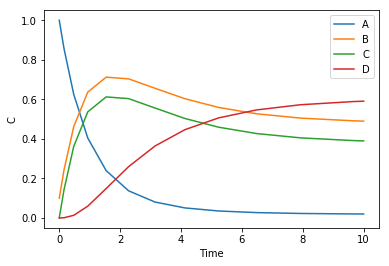

In [9]:
#Solving A --> B + C --> D in batch reactor
# included reverse reactions
from scipy.integrate import solve_ivp


def ode(t, C):
    Ca, Cb, Cc, Cd = C
    dCadt = -k1 * Ca + k_1 * Cb * Cc
    dCbdt = k1 * Ca - k_1 * Cb * Cc - k2 * Cb * Cc + k_2 * Cd 
    dCcdt = k1 * Ca - k_1 * Cb * Cc - k2 * Cb * Cc + k_2 * Cd
    dCddt = k2 * Cb * Cc - k_2 * Cd
    
    return [dCadt, dCbdt, dCcdt, dCddt]

C0 = [1, 0.1, 0.0, 0.0]
k1 = 1
k2 = 0.4
k_1 = 0.1
k_2 = 0.12



sol = solve_ivp(ode, (0, 10), C0)
#print(sol.y.T)

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(sol.t, sol.y.T)
plt.legend(['A', 'B', 'C', 'D'])
plt.xlabel('Time')
plt.ylabel('C')
#sol

# using CVode from assimulo

In [10]:
from assimulo.solvers import sundials
import numpy as np
import pylab as pl

In [11]:
def rhs(t,y):
    A =np.array([[0,1],[-2,-1]])
    yd=np.dot(A,y)

    return yd


In [12]:
y0=np.array([1.0,1.0])
t0=0.0

In [13]:
from assimulo.problem import Explicit_Problem  #Imports the problem formulation from Assimulo

model = Explicit_Problem(rhs, y0, t0) #Create an Assimulo problem
model.name = 'Linear Test ODE'        #Specifies the name of problem (optional)

In [14]:
sim = sundials.CVode(model)

In [15]:
tfinal = 10.0        #Specify the final time

t, y = sim.simulate(tfinal) #Use the .simulate method to simulate and provide the final time

Final Run Statistics: Linear Test ODE 

 Number of steps                                 : 123
 Number of function evaluations                  : 139
 Number of Jacobian evaluations                  : 3
 Number of function eval. due to Jacobian eval.  : 6
 Number of error test failures                   : 2
 Number of nonlinear iterations                  : 135
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-06
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 10.0 seconds.
Elapsed simulation time: 0.010154558927752078 seconds.


(124, 2)


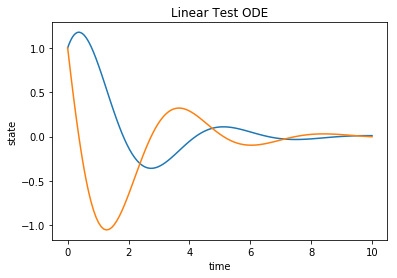

In [16]:
print(y.shape)
sim.plot()

In [17]:
A =np.array([[0,1],[-2,-1]])
print(A)
#yd=np.dot(A,y)

[[ 0  1]
 [-2 -1]]


In [18]:
y0=np.array([1.0,1.0])
yd = np.dot(A,y0)
print(yd)

[ 1. -3.]


In [23]:
import numpy as N
import pylab as P
#import nose
from assimulo.solvers import CVode
from assimulo.problem import Explicit_Problem
dcdt = ['dy[0]/dt = -k1 * y[0]', 'dy[1]/dt = k1 * y[0] - k2 * y[1]', 'dy[2]/dt = k2 * y[1]']
k1 = 1
k2 = 1
    
def run_example(with_plots=True):
    r"""
    Demonstration of the use of CVode by solving the
    linear test equation :math:`\dot y = - y`
    
    on return:
    
       - :dfn:`exp_mod`    problem instance
    
       - :dfn:`exp_sim`    solver instance
       
    """

    y0=[1.0, 0.0, 0.0]
    dydt = np.zeros((3), dtype = float)
    #Define the rhs
    y = y0
    def ode(t, C):
#         y = C   
#         for i in range (len(dcdt)):
#             dydt[i] = eval(dcdt[i].split('=')[1])
#         print(dydt)
#         return dydt
        #return N.array([ydot])
        Ca, Cb, Cc = C
        dCadt = -k1 * Ca + k_1 * Cb
        dCbdt = k1 * Ca - k2 * Cb - k_1 * Cb + k_2 * Cc
        dCcdt = k2 * Cb - k_2 * Cc
        return [dCadt, dCbdt, dCcdt]  
    
    k_1 = 0.1
    k_2 = 0.1
    #print(ode(8, y))
    
    t0 = 0
    #Define an Assimulo problem
    exp_mod = Explicit_Problem(ode, y0, name = r'CVode Test Example: A --> B --> C')
    
    #Define an explicit solver
    exp_sim = CVode(exp_mod) #Create a CVode solver
    
    #Sets the parameters
    exp_sim.iter  = 'Newton' #Default 'FixedPoint'
    exp_sim.discr = 'BDF' #Default 'Adams'
    exp_sim.atol = [1e-5] #Default 1e-6
    exp_sim.rtol = 1e-5 #Default 1e-6

    #Simulate
    t1, y1 = exp_sim.simulate(10, 500) #Simulate 5 seconds
    #t2, y2 = exp_sim.simulate(7) #Simulate 2 seconds more
    print(len(t1))
    #Basic test
    #nose.tools.assert_almost_equal(float(y2[-1]), 0.00347746, 5)
    #nose.tools.assert_almost_equal(exp_sim.get_last_step(), 0.0222169642893, 3)
    
    #Plot
    if with_plots:
        P.plot(t1, y1, color="b")
        #P.plot(t2, y2, color="r")
        P.title(exp_mod.name)
        P.ylabel('y')
        P.xlabel('Time')
        P.show()
    #return exp_mod, exp_sim
    return t1, y1

Final Run Statistics: CVode Test Example: A --> B --> C 

 Number of steps                                 : 61
 Number of function evaluations                  : 78
 Number of Jacobian evaluations                  : 1
 Number of function eval. due to Jacobian eval.  : 3
 Number of error test failures                   : 1
 Number of nonlinear iterations                  : 74
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-05
 Tolerances (relative)    : 1e-05

Simulation interval    : 0.0 - 10.0 seconds.
Elapsed simulation time: 0.0007790860254317522 seconds.
62


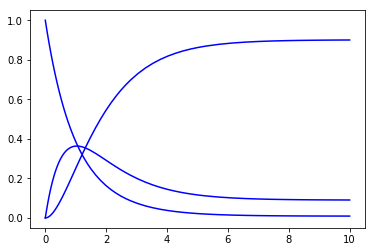

In [20]:
mod, sim = run_example(with_plots=False)
print(len(mod))
P.plot(mod, sim, color="b")

Final Run Statistics: Linear Test ODE 

 Number of steps                                 : 123
 Number of function evaluations                  : 139
 Number of Jacobian evaluations                  : 3
 Number of function eval. due to Jacobian eval.  : 6
 Number of error test failures                   : 2
 Number of nonlinear iterations                  : 135
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-06
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 10.0 seconds.
Elapsed simulation time: 0.0029890669975429773 seconds.
501
[[ 1.          1.        ]
 [ 1.01939762  0.94020855]
 [ 1.03760777  0.88085582]
 ...
 [ 0.01009819 -0.00179641]
 [ 0.01005861 -0.00215998]
 [ 0.01001185 -0.00251463]]


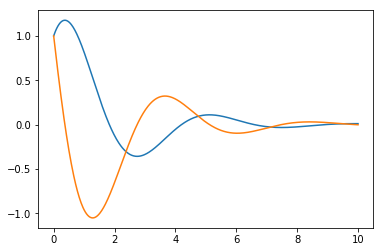

In [22]:
def run_example():

    def rhs(t,y):
        A =N.array([[0,1],[-2,-1]])
        yd=N.dot(A,y)
        
        return yd
        
    y0=N.array([1.0,1.0])
    t0=0.0
        
    model = Explicit_Problem(rhs,y0,t0) #Create an Assimulo problem
    model.name = 'Linear Test ODE'

    sim = CVode(model) #Create the solver CVode

    tfinal = 10.0 #Specify the final time
        
    t,y = sim.simulate(10, 500) #Use the .simulate method to simulate and provide the final time
    print(len(t))
    print(y)    
    #Plot
    P.plot(t,y)
    P.show()

if __name__=='__main__':
    run_example()

In [79]:
print(len(t))

124


In [76]:
print(rhs(0, y0))

[ 1. -3.]


In [25]:
print(mod)

In [98]:
import numpy as N
import scipy.sparse as SP
import pylab as P
#import nose
from assimulo.solvers import CVode
from assimulo.problem import Explicit_Problem


def run_example_jac(with_plots=True):
    r"""
    Example for demonstrating the use of a user supplied Jacobian (sparse).
    Note that this will only work if Assimulo has been configured with
    Sundials + SuperLU. Based on the SUNDIALS example cvRoberts_sps.c
    
    ODE:
    
    .. math::
       
       \dot y_1 &= -0.04y_1 + 1e4 y_2 y_3 \\
       \dot y_2 &= - \dot y_1 - \dot y_3 \\
       \dot y_3 &= 3e7 y_2^2
       
    
    on return:
    
       - :dfn:`exp_mod`    problem instance
    
       - :dfn:`exp_sim`    solver instance
       
    """
    
    #Defines the rhs
    def f(t,y):
        yd_0 = -0.04*y[0] + 1e4*y[1]*y[2]
        yd_2 = 3e7*y[1]*y[1]
        yd_1 = -yd_0 - yd_2
        return N.array([yd_0,yd_1,yd_2])
    
    #Defines the Jacobian
    def jac(t,y):
        
        colptrs = [0,3,6,9]
        rowvals = [0, 1, 2, 0, 1, 2, 0, 1, 2]
        data = [-0.04, 0.04, 0.0, 1e4*y[2], -1e4*y[2]-6e7*y[1], 6e7*y[1], 1e4*y[1], -1e4*y[1], 0.0]

        J = SP.csc_matrix((data, rowvals, colptrs))
        return J
    
    #Defines an Assimulo explicit problem
    y0 = [1.0,0.0,0.0] #Initial conditions

    exp_mod = Explicit_Problem(f,y0, name = 'Example using analytic (sparse) Jacobian')
    
    exp_mod.jac = jac #Sets the Jacobian
    exp_mod.jac_nnz = 9
   
    
    exp_sim = CVode(exp_mod) #Create a CVode solver
    
    #Set the parameters
    exp_sim.iter = 'Newton' #Default 'FixedPoint'
    exp_sim.discr = 'BDF' #Default 'Adams'
    exp_sim.atol = [1e-8,1e-14,1e-6] #Default 1e-6
    exp_sim.rtol = 1e-4 #Default 1e-6
    exp_sim.linear_solver = "sparse"
    
    #Simulate
    t, y = exp_sim.simulate(0.4) #Simulate 0.4 seconds
    
    #Basic tests
    #nose.tools.assert_almost_equal(y[-1][0],0.9851,3)
        
    #Plot
    if with_plots:
        P.plot(t,y[:,1],linestyle="dashed",marker="o") #Plot the solution
        P.xlabel('Time')
        P.ylabel('State')
        P.title(exp_mod.name)
        P.show()
        
    return exp_mod, exp_sim

In [99]:
mod, sim = run_example_jac(with_plots=False)
#sim.plot()

AssimuloException: No support for SuperLU was detected, please verify that SuperLU and SUNDIALS has been installed correctly.

# Using a NN to learn the solution

[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.99001498e-01 9.98002997e-04 4.98668790e-07]
 [9.89071153e-01 1.08689083e-02 5.99386008e-05]
 [8.95038043e-01 9.92499215e-02 5.71203529e-03]
 [6.69917987e-01 2.68368171e-01 6.17138423e-02]
 [4.26074162e-01 3.63489247e-01 2.10436591e-01]
 [2.36207442e-01 3.40810387e-01 4.22982171e-01]
 [1.17854824e-01 2.51920808e-01 6.30224368e-01]
 [5.30952648e-02 1.55752116e-01 7.91152619e-01]
 [2.20937321e-02 8.41172214e-02 8.93789046e-01]
 [8.68080671e-03 4.11187347e-02 9.50200459e-01]
 [3.29282113e-03 1.87686616e-02 9.77938517e-01]
 [1.21980318e-03 8.15492505e-03 9.90625272e-01]
 [4.38129867e-04 3.37356940e-03 9.96188301e-01]
 [1.48577146e-04 1.30257446e-03 9.98548848e-01]
 [4.62401599e-05 4.58157630e-04 9.99495602e-01]
 [4.59238317e-05 4.55338624e-04 9.99498738e-01]]


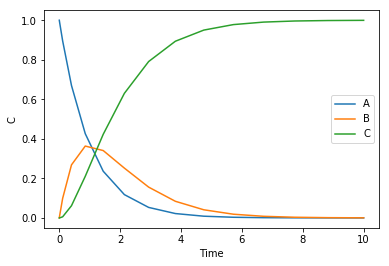

In [21]:
from scipy.integrate import solve_ivp

def ode(t, C):
    Ca, Cb, Cc = C
    dCadt = -k1 * Ca
    dCbdt = k1 * Ca - k2 * Cb
    dCcdt = k2 * Cb
    return [dCadt, dCbdt, dCcdt]

C0 = [1.0, 0.0, 0.0]
k1 = 1
k2 = 1

sol = solve_ivp(ode, (0, 10), C0)
#print(sol.y.T)

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(sol.t, sol.y.T)
plt.legend(['A', 'B', 'C'])
plt.xlabel('Time')
plt.ylabel('C')
print(sol.y.T)

In [22]:
import autograd.numpy as np
from autograd import grad, elementwise_grad, jacobian
import autograd.numpy.random as npr
from autograd.misc.optimizers import adam

In [23]:
def init_random_params(scale, layer_sizes, rs=npr.RandomState(0)):
    """Build a list of (weights, biases) tuples, one for each layer."""
    return [(rs.randn(insize, outsize) * scale,   # weight matrix
             rs.randn(outsize) * scale)           # bias vector
            for insize, outsize in zip(layer_sizes[:-1], layer_sizes[1:])]

In [39]:
def swish(x):
    "see https://arxiv.org/pdf/1710.05941.pdf"
    return x / (1.0 + np.exp(-x))

def C(params, inputs):
    "Neural network functions"
    for W, b in params:
        outputs = np.dot(inputs, W) + b
        inputs = swish(outputs)
        #print(inputs)
    #print(outputs)
    return outputs

# initial guess for the weights and biases
params = init_random_params(0.1, layer_sizes=[1, 8, 3])
#C(params, sol.t.reshape([-1, 1]))
#Ca, Cb, Cc = C(params, t).T
inputs = sol.t.reshape([-1, 1])

Text(0, 0.5, 'C')

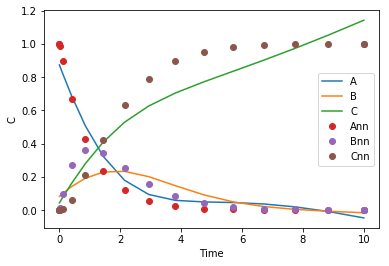

In [40]:
def objective_soln(params, step):
    return np.sum((sol.y.T - C(params, sol.t.reshape([-1, 1])))**2)

params = adam(grad(objective_soln), params,
              step_size=0.001, num_iters=500)

plt.plot(sol.t.reshape([-1, 1]), C(params, sol.t.reshape([-1, 1])),
         sol.t, sol.y.T, 'o')
plt.legend(['A', 'B', 'C', 'Ann', 'Bnn', 'Cnn'])
plt.xlabel('Time')
plt.ylabel('C')
#print(C(params, sol.t.reshape([-1, 1])))

In [41]:

params = init_random_params(0.1, layer_sizes=[1, 1, 3])
print(params)
print(params[0])
print(params[1])
params = adam(grad(objective_soln), params,
              step_size=0.001, num_iters=1)
#print(params[1])

[(array([[-0.01595734]]), array([-0.01337016])), (array([[ 0.10777438, -0.11268258, -0.07306778]]), array([-0.03848798,  0.00943516, -0.00421715]))]
(array([[-0.01595734]]), array([-0.01337016]))
(array([[ 0.10777438, -0.11268258, -0.07306778]]), array([-0.03848798,  0.00943516, -0.00421715]))


## Solving ODE with a NN

In [4]:
jac = jacobian(C, 1)

def dCdt(params, t):
    i = np.arange(len(t))
    return jac(params, t)[i, :, i].reshape((len(t), 3))

t = np.linspace(0, 10, 25).reshape((-1, 1))
params = init_random_params(0.1, layer_sizes=[1, 8, 3])
i = 0    # number of training steps
N = 501  # epochs for training
et = 0.0 # total elapsed time


NameError: name 'jacobian' is not defined

In [34]:
def objective(params, step):
    Ca, Cb, Cc = C(params, t).T
    dCadt, dCbdt, dCcdt = dCdt(params, t).T

    z1 = np.sum((dCadt + k1 * Ca)**2)
    z2 = np.sum((dCbdt - k1 * Ca + k2 * Cb)**2)
    z3 = np.sum((dCcdt - k2 * Cb)**2)
    ic = np.sum((np.array([Ca[0], Cb[0], Cc[0]]) - C0)**2)  # initial conditions
    #print(z1, z2, z3, ic)
    return z1 + z2 + z3 + ic

def callback(params, step, g):
    if step % 100 == 0:
        print("Iteration {0:3d} objective {1}".format(step,
                                                      objective(params, step)))

objective(params, 0)  # make sure the objective is scalar

2.609432972496788

Iteration   0 objective 2.609432972496788
Iteration 100 objective 1.0249299087153303
Iteration 200 objective 0.9234474934487107
Iteration 300 objective 0.8325458225725828
Iteration 400 objective 0.7111813748090057
Iteration 500 objective 0.5837909368479105
0.3 minutes elapsed this time. Total time = 0.34 min. Total epochs = 501.


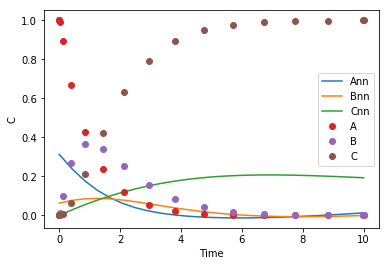

In [35]:
import time
t0 = time.time()

params = adam(grad(objective), params,
              step_size=0.001, num_iters=N, callback=callback)

i += N
t1 = (time.time() - t0) / 60
et += t1

plt.plot(t, C(params, t), sol.t, sol.y.T, 'o')
plt.legend(['Ann', 'Bnn', 'Cnn', 'A', 'B', 'C'])
plt.xlabel('Time')
plt.ylabel('C')
print(f'{t1:1.1f} minutes elapsed this time. Total time = {et:1.2f} min. Total epochs = {i}.')

Text(0, 0.5, 'A')

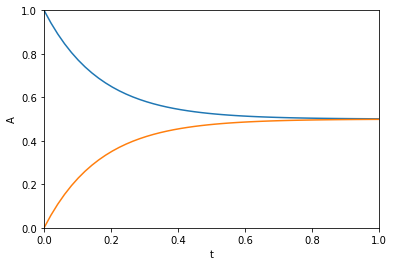

In [36]:
import autograd.numpy as np

A0 = 1.0

def A(t, k1, k_1):
    return A0 / (k1 + k_1) * (k1 * np.exp(-(k1 + k_1) * t) + k_1)

%matplotlib inline
import matplotlib.pyplot as plt

t = np.linspace(0, 1)

k1 = 3.0
k_1 = 3.0
plt.plot(t, A(t, k1, k_1))
plt.plot(t, A0 - A(t, k1, k_1))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('t')
plt.ylabel('A')

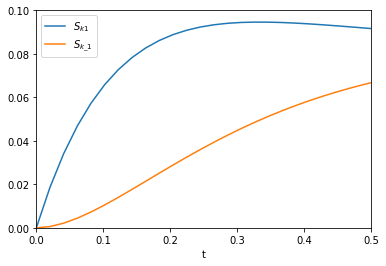

In [37]:
from autograd import jacobian

dAdk1 = jacobian(A, 1)
dAdk_1 = jacobian(A, 2)

plt.plot(t, np.abs(dAdk1(t, k1, k_1)))
plt.plot(t, np.abs(dAdk_1(t, k1, k_1)))
plt.xlim([0, 0.5])
plt.ylim([0, 0.1])
plt.xlabel('t')
plt.legend(['$S_{k1}$', '$S_{k\_1}$'])

In [38]:
import scikits


ModuleNotFoundError: No module named 'scikits'

Final Run Statistics: Example: Computing Sensitivities 

 Number of steps                                       : 139
 Number of function evaluations                        : 164
 Number of Jacobian evaluations                        : 3
 Number of function eval. due to Jacobian eval.        : 9
 Number of error test failures                         : 2
 Number of nonlinear iterations                        : 160
 Number of nonlinear convergence failures              : 0
 Number of sensitivity evaluations                     : 164
 Number of function eval. due to sensitivity eval.     : 984
 Number of sensitivity nonlinear iterations            : 0
 Number of sensitivity nonlinear convergence failures  : 0
 Number of sensitivity error test failures             : 0

Sensitivity options:

 Method                   : SIMULTANEOUS
 Difference quotient type : CENTERED
 Suppress Sens            : False

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonli

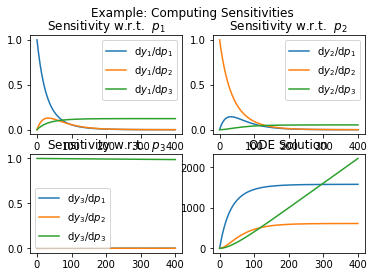

In [32]:
from assimulo.solvers import CVode
from assimulo.problem import Explicit_Problem
import numpy as np
import pylab as pl

def run_example(with_plots=True):
    r"""
    This example shows how to use Assimulo and CVode for simulating sensitivities
    for initial conditions.

    .. math::
    
       \dot y_1 &= -(k_{01}+k_{21}+k_{31}) y_1 + k_{12} y_2 + k_{13} y_3 + b_1\\
       \dot y_2 &= k_{21} y_1 - (k_{02}+k_{12}) y_2 \\
       \dot y_3 &= k_{31} y_1 - k_{13} y_3
     
    with the parameter dependent inital conditions 
    :math:`y_1(0) = 0, y_2(0) = 0, y_3(0) = 0` . The initial values are taken as parameters :math:`p_1,p_2,p_3`
    for the computation of the sensitivity matrix, 
    see http://sundials.2283335.n4.nabble.com/Forward-sensitivities-for-initial-conditions-td3239724.html
    
    on return:
    
       - :dfn:`exp_mod`    problem instance
    
       - :dfn:`exp_sim`    solver instance
    
    """
    def f(t, y, p):
        y1,y2,y3 = y
        k01 = 0.0211
        k02 = 0.0162
        k21 = 0.0111
        k12 = 0.0124
        k31 = 0.0039
        k13 = 0.000035
        b1 = 49.3
        
        yd_0 = -(k01+k21+k31)*y1+k12*y2+k13*y3+b1
        yd_1 = k21*y1-(k02+k12)*y2
        yd_2 = k31*y1-k13*y3
        
        return np.array([yd_0,yd_1,yd_2])
    
    #The initial conditions
    y0 = [0.0,0.0,0.0]          #Initial conditions for y
    p0 = [0.0, 0.0, 0.0]  #Initial conditions for parameters
    yS0 = np.array([[1,0,0],[0,1,0],[0,0,1.]])
    
    #Create an Assimulo explicit problem
    exp_mod = Explicit_Problem(f, y0, p0=p0,name='Example: Computing Sensitivities')
    
    #Sets the options to the problem
    exp_mod.yS0 = yS0
    
    #Create an Assimulo explicit solver (CVode)
    exp_sim = CVode(exp_mod)
    
    #Sets the paramters
    exp_sim.iter = 'Newton'
    exp_sim.discr = 'BDF'
    exp_sim.rtol = 1e-7
    exp_sim.atol = 1e-6
    exp_sim.pbar = [1,1,1] #pbar is used to estimate the tolerances for the parameters
    exp_sim.report_continuously = True #Need to be able to store the result using the interpolate methods
    exp_sim.sensmethod = 'SIMULTANEOUS' #Defines the sensitvity method used
    exp_sim.suppress_sens = False            #Dont suppress the sensitivity variables in the error test.
    
    #Simulate
    t, y = exp_sim.simulate(400) #Simulate 400 seconds


    #Plot
    if with_plots:
        title_text=r"Sensitivity w.r.t.  ${}$"
        legend_text=r"$\mathrm{{d}}{}/\mathrm{{d}}{}$"
        pl.figure(1)
        pl.subplot(221)
        pl.plot(t, np.array(exp_sim.p_sol[0])[:,0],
               t, np.array(exp_sim.p_sol[0])[:,1],
               t, np.array(exp_sim.p_sol[0])[:,2])
        pl.title(title_text.format('p_1'))
        pl.legend((legend_text.format('y_1','p_1'),
                  legend_text.format('y_1','p_2'),
                  legend_text.format('y_1','p_3')))
        pl.subplot(222)
        pl.plot(t, np.array(exp_sim.p_sol[1])[:,0],
               t, np.array(exp_sim.p_sol[1])[:,1],
               t, np.array(exp_sim.p_sol[1])[:,2])
        pl.title(title_text.format('p_2'))
        pl.legend((legend_text.format('y_2','p_1'),
                  legend_text.format('y_2','p_2'),
                  legend_text.format('y_2','p_3')))
        pl.subplot(223)
        pl.plot(t, np.array(exp_sim.p_sol[2])[:,0],
               t, np.array(exp_sim.p_sol[2])[:,1],
               t, np.array(exp_sim.p_sol[2])[:,2])
        pl.title(title_text.format('p_3'))
        pl.legend((legend_text.format('y_3','p_1'),
                  legend_text.format('y_3','p_2'),
                  legend_text.format('y_3','p_3')))
        pl.subplot(224)
        pl.title('ODE Solution')
        pl.plot(t, y)
        pl.suptitle(exp_mod.name)
        pl.show()
        
        return exp_mod, exp_sim


if __name__=='__main__':
    mod,sim = run_example()